In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import StratifiedKFold

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   


In [3]:

stratified_kfold = StratifiedKFold(n_splits=5)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []  # To store confusion matrices



In [4]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    dnaive_bayes = GaussianNB()  
    dnaive_bayes.fit(X_train, y_train)

    y_pred = dnaive_bayes.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    
    confusion = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(confusion)
    
# Calculate and print the mean and standard deviation of metrics
print("Mean Accuracy =", np.mean(accuracy_scores))
print("Mean Precision =", np.mean(precision_scores))
print("Mean Recall =", np.mean(recall_scores))
print("Mean F1-score =", np.mean(f1_scores))

print("Standard Deviation Accuracy =", np.std(accuracy_scores))
print("Standard Deviation Precision =", np.std(precision_scores))
print("Standard Deviation Recall =", np.std(recall_scores))
print("Standard Deviation F1-score =", np.std(f1_scores))

for i, confusion in enumerate(confusion_matrices):
    print(f'Confusion Matrix for Fold {i + 1}:')
    print(confusion)



Mean Accuracy = 0.7973001933167633
Mean Precision = 0.6830890653950388
Mean Recall = 0.7473141666131577
Mean F1-score = 0.6737330430987031
Standard Deviation Accuracy = 0.05964869797480528
Standard Deviation Precision = 0.10862924811664751
Standard Deviation Recall = 0.11391513040773672
Standard Deviation F1-score = 0.10184194430460862
Confusion Matrix for Fold 1:
[[265  50  16]
 [ 11  44   4]
 [  5  26   5]]
Confusion Matrix for Fold 2:
[[256  74   1]
 [  4  55   0]
 [  0  24  11]]
Confusion Matrix for Fold 3:
[[316  13   2]
 [  8  49   2]
 [  4  10  21]]
Confusion Matrix for Fold 4:
[[262  49  20]
 [  8  45   6]
 [  1   0  34]]
Confusion Matrix for Fold 5:
[[247  54  30]
 [  8  50   1]
 [  0   0  35]]


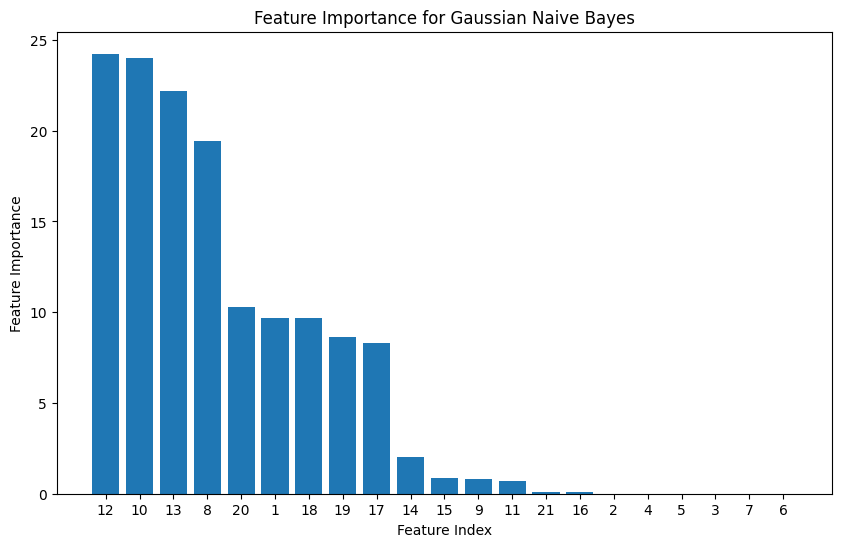

In [5]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt

# Assuming X, y are your feature matrix and target variable
gnb = GaussianNB()
gnb.fit(X, y)

# Get the mean for each feature and each class
means = gnb.theta_

# Calculate a simple measure of importance (e.g., mean difference)
feature_importance = np.abs(means[1] - means[0])

# Sort features by importance
sorted_features = np.argsort(feature_importance)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importance[sorted_features])
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Gaussian Naive Bayes')
plt.xticks(range(X.shape[1]), sorted_features + 1)  # Adding 1 to make indices start from 1
plt.show()


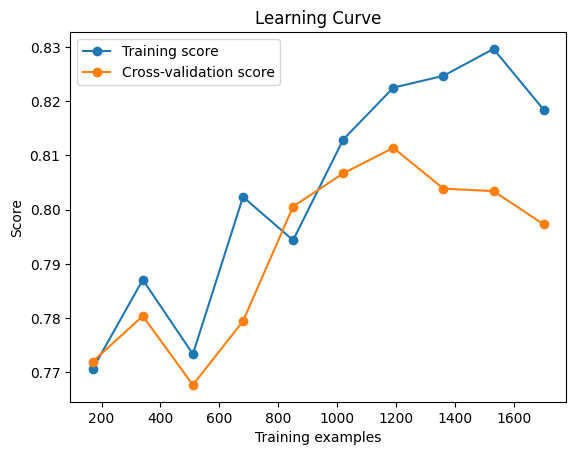

In [6]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(dnaive_bayes, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()